# Install and Import Modules

In [80]:
# Installing the required modules
!pip install opencv-python easyocr -q

In [81]:
!git clone https://github.com/Frenz86/EasyOCR_Project.git

Cloning into 'EasyOCR_Project'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 9), reused 17 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 429.60 KiB | 5.00 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [82]:
cd EasyOCR_Project

/content/EasyOCR_Project/EasyOCR_Project/EasyOCR_Project/EasyOCR_Project/EasyOCR_Project


In [83]:
# Installing the CPU and CUDA
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [84]:
# Importing the different libraries
import cv2
import easyocr
import matplotlib.pyplot as plt
import os

# Defining the path of images

In [104]:
# Optional by defining the path of each images
img0_path = '../images/test_01.png'



In [108]:
# Extracting the path of images one by one in the form of list
img_path = "./imvages/"
create_path = lambda f : os.path.join(img_path, f)
test_image_files = os.listdir(img_path)

for f in test_image_files:
    print(f)

text4.jpg
text2.jpg
text1.jpg
text3.jpg
text0.jpg


In [87]:
# loading the path of image by passing the position of the image
img = test_image_files[0]
path = create_path(img)

# Recognizing the text from images

In [88]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''

    reader = easyocr.Reader(['en'])        # For English - 'en'
    return reader.readtext(img_path)

In [89]:
result = recognize_text(path)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [90]:
result

[([[np.int32(25), np.int32(5)],
   [np.int32(193), np.int32(5)],
   [np.int32(193), np.int32(21)],
   [np.int32(25), np.int32(21)]],
  'WHEN [ TELL YOUILOVE YOU;',
  np.float64(0.6455368066025712)),
 ([[np.int32(29), np.int32(23)],
   [np.int32(193), np.int32(23)],
   [np.int32(193), np.int32(39)],
   [np.int32(29), np.int32(39)]],
  'IDONT SAY IT OUT OF HABIT',
  np.float64(0.7181821615340839)),
 ([[np.int32(24), np.int32(40)],
   [np.int32(195), np.int32(40)],
   [np.int32(195), np.int32(58)],
   [np.int32(24), np.int32(58)]],
  'ISAY IT TO REMIND YOU THAT',
  np.float64(0.6261941421639804)),
 ([[np.int32(9), np.int32(61)],
   [np.int32(213), np.int32(61)],
   [np.int32(213), np.int32(75)],
   [np.int32(9), np.int32(75)]],
  'YOURE THE BEST THINO THAT EVER',
  np.float64(0.44373350643891113)),
 ([[np.int32(59), np.int32(79)],
   [np.int32(163), np.int32(79)],
   [np.int32(163), np.int32(93)],
   [np.int32(59), np.int32(93)]],
  'HAPPENED TO ME',
  np.float64(0.7817463140165201))]

# Loading the image

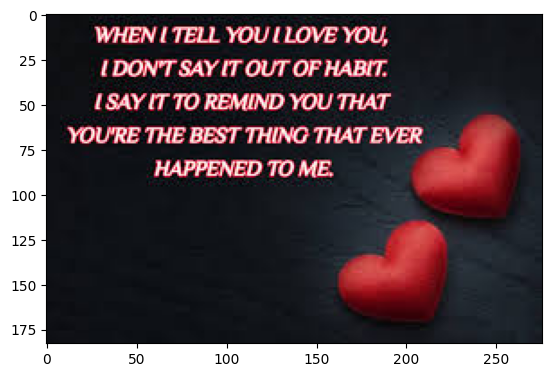

In [91]:
# Showing the current(Selected) image
img_1 = cv2.imread(path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Process of Extraction

In [92]:
def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''

    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # Recognise text
    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)

            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./Output/{save_name}_overlay.jpg', bbox_inches='tight')

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Detected text: WHEN [ TELL YOUILOVE YOU; (Probability: 0.65)
Detected text: IDONT SAY IT OUT OF HABIT (Probability: 0.72)
Detected text: ISAY IT TO REMIND YOU THAT (Probability: 0.63)
Detected text: YOURE THE BEST THINO THAT EVER (Probability: 0.44)
Detected text: HAPPENED TO ME (Probability: 0.78)


<Figure size 640x480 with 0 Axes>

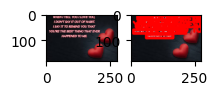

In [93]:
overlay_ocr_text(path, 'Text3_Output')

# Final Output(text)

In [94]:
# Extracting text from the image
def ocr_text(img_path):

    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay text
    for(bbox, text, prob) in result:
        if prob:
            print(f'{text}')


In [95]:
# Extracted Text
ocr_text(path)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


WHEN [ TELL YOUILOVE YOU;
IDONT SAY IT OUT OF HABIT
ISAY IT TO REMIND YOU THAT
YOURE THE BEST THINO THAT EVER
HAPPENED TO ME
